# Complexity Measurement

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import entropy, zscore


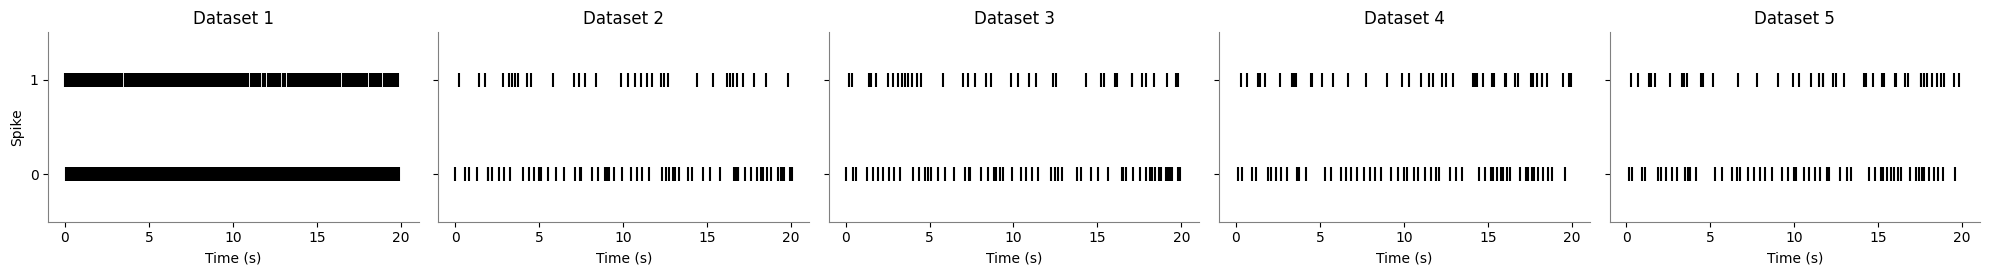


Data1 Statistics:
Number of spikes: 246
Total duration: 19.84 seconds
Average inter-spike interval: 0.0407 seconds

Data2 Statistics:
Number of spikes: 34.0
Total duration: 20.05 seconds
Average inter-spike interval: 0.2136 seconds

Data3 Statistics:
Number of spikes: 39.0
Total duration: 19.88 seconds
Average inter-spike interval: 0.2050 seconds

Data4 Statistics:
Number of spikes: 43.0
Total duration: 19.80 seconds
Average inter-spike interval: 0.2011 seconds

Data5 Statistics:
Number of spikes: 43.0
Total duration: 19.65 seconds
Average inter-spike interval: 0.1988 seconds


In [2]:
# File path
file_path = r"C:\Users\adnan\OneDrive\Documents\Complexity_Shokkom_Sharma\relu\meta_data.csv"
spike_data = pd.read_csv(file_path)

# Function to process dataset
def process_dataset(df, column_name):
    data = df[[column_name, df.columns[df.columns.get_loc(column_name) + 1]]].copy()
    data.columns = ['Time', 'Spike']
    data = data.iloc[1:]  # Remove the header row
    data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
    data['Spike'] = pd.to_numeric(data['Spike'], errors='coerce')
    data = data.dropna()
    data['Dataset'] = column_name
    return data

dataframes = []
for column in ['Data1', 'Data2', 'Data3', 'Data4', 'Data5']:
    if column in spike_data.columns:
        df = process_dataset(spike_data, column)
        dataframes.append(df)
    else:
        print(f"Column {column} not found in the dataset")

def plot_spike_trains(dataframes):
    fig, axes = plt.subplots(1, 5, figsize=(20, 3), sharex=True, sharey=True)
    #fig.suptitle('Spike Trains for All Datasets', fontsize=16, color='black')

    for i, (df, ax) in enumerate(zip(dataframes, axes)):
        ax.scatter(df['Time'], df['Spike'], color='black', marker='|', s=100) 
        ax.set_ylim(-0.5, 1.5)
        ax.set_yticks([0, 1])
        ax.set_title(f'Dataset {i+1}', color='black', fontsize=12)
        ax.set_xlabel('Time (s)', color='black', fontsize=10)
        if i == 0:
            ax.set_ylabel('Spike', color='black', fontsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')
        ax.tick_params(axis='x', colors='black')
        ax.tick_params(axis='y', colors='black')
        ax.grid(False)  
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot individual spike trains in one row
plot_spike_trains(dataframes)


# Print basic statistics for each dataset
for df in dataframes:
    print(f"\n{df['Dataset'].iloc[0]} Statistics:")
    print(f"Number of spikes: {df['Spike'].sum()}")
    print(f"Total duration: {df['Time'].max() - df['Time'].min():.2f} seconds")
    print(f"Average inter-spike interval: {df['Time'].diff().mean():.4f} seconds")

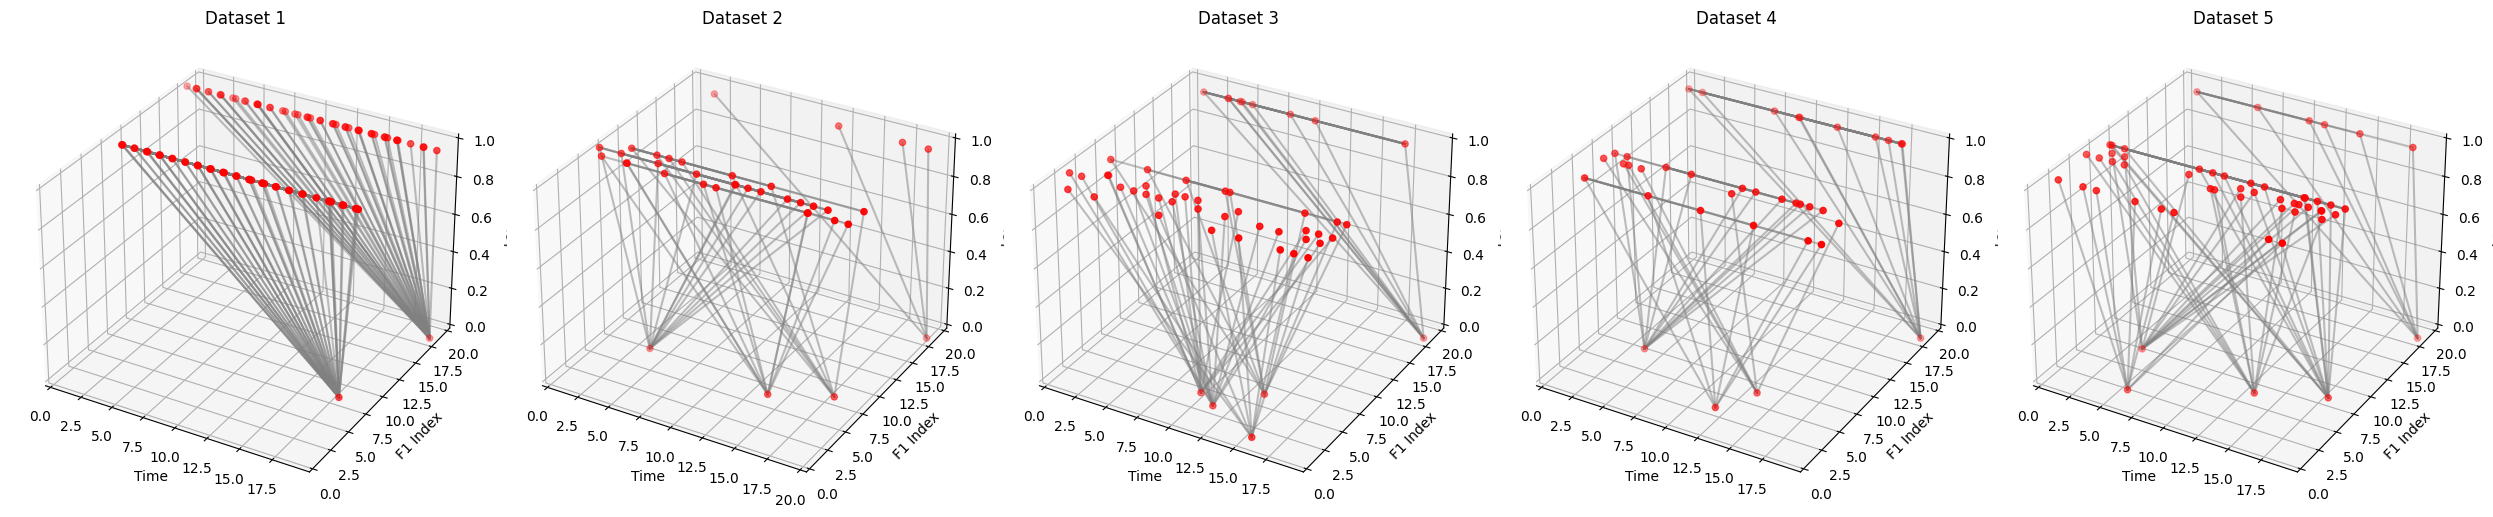


Dataset 1 Transformation Analysis:
F1 values (x(t)):
2.00, 16.00, 6.00, 12.00, 10.00, 8.00, 14.00, 4.00, 18.00, 0.00, 22.00, -4.00, 26.00, -8.00, 30.00, -12.00, 34.00, -16.00, 38.00, -20.00

Selected points from dataset:
1.963466, 15.988920, 5.974922, 11.937204, 9.960757, 7.979735, 13.976940, 3.978271, 17.957285, N/A, 19.875018, N/A, 19.875018, N/A, 19.875018, N/A, 19.875018, N/A, 19.875018, N/A

First significant digits after decimal point (d):
9, 9, 9, 9, 9, 9, 9, 9, 9, N/A, 8, N/A, 8, N/A, 8, N/A, 8, N/A, 8, N/A

Number of connections for each selected point:
Point 1.963466 (d=9): 50 connections
Point 15.988920 (d=9): 50 connections
Point 5.974922 (d=9): 50 connections
Point 11.937204 (d=9): 50 connections
Point 9.960757 (d=9): 50 connections
Point 7.979735 (d=9): 50 connections
Point 13.976940 (d=9): 50 connections
Point 3.978271 (d=9): 50 connections
Point 17.957285 (d=9): 50 connections
Point 19.875018 (d=8): 51 connections
Point 19.875018 (d=8): 51 connections
Point 19.875018 (

In [43]:
# Function F1
def F1(t):
    return 10 + (10 - 2*t) * np.cos(t * np.pi)

# Function F2 (vectorized)
def F2(x):
    frac_part = x - np.floor(x)
    n = np.ceil(np.log10(1 / frac_part)).astype(int)
    return np.floor((10**n) * frac_part)

# Function to find the point in the dataset just less than x(t)
def find_point_less_than(df, value):
    return df[df['Time'] < value]['Time'].max()

# Function to find points with the same first significant digit
def find_points_with_same_digit(df, x, d):
    return df[np.isclose(F2(df['Time']), d)]['Time'].tolist()

# Function to create and plot the multinodal graph
def plot_multinodal_graph(dataframes):
    fig, axes = plt.subplots(1, 5, figsize=(25, 5), subplot_kw={'projection': '3d'})
    #fig.suptitle('Multinodal Graph Transformation of Spike Trains', fontsize=16)
    
    for i, (df, ax) in enumerate(zip(dataframes, axes)):
        G = nx.Graph()
        
        # Calculate F1 values
        t_values = np.arange(1, 21)
        x_t_values = F1(t_values)
        
        # Find points in dataset and create nodes
        selected_points = [find_point_less_than(df, x) for x in x_t_values]
        for j, point in enumerate(selected_points):
            if pd.notna(point):
                G.add_node(point, pos=(point, j, 0))
                d = F2(point)
                connected_points = find_points_with_same_digit(df, point, d)
                for connected_point in connected_points:
                    if connected_point != point:
                        G.add_node(connected_point, pos=(connected_point, j, 1))
                        G.add_edge(point, connected_point)
        
        # Get node positions
        pos = nx.get_node_attributes(G, 'pos')
        
        # Plot edges
        for edge in G.edges():
            x = [pos[edge[0]][0], pos[edge[1]][0]]
            y = [pos[edge[0]][1], pos[edge[1]][1]]
            z = [pos[edge[0]][2], pos[edge[1]][2]]
            ax.plot(x, y, z, c='gray', alpha=0.5)
        
        # Plot nodes
        x = [pos[node][0] for node in G.nodes()]
        y = [pos[node][1] for node in G.nodes()]
        z = [pos[node][2] for node in G.nodes()]
        ax.scatter(x, y, z, c='red', s=20)
        
        ax.set_title(f'Dataset {i+1}')
        ax.set_xlabel('Time')
        ax.set_ylabel('F1 Index')
        ax.set_zlabel('Layer')
        ax.set_xlim(0, df['Time'].max())
        ax.set_ylim(0, 20)
        ax.set_zlim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Plot multinodal graphs
plot_multinodal_graph(dataframes)

# Additional analysis (same as before)
for i, df in enumerate(dataframes, 1):
    print(f"\nDataset {i} Transformation Analysis:")
    t_values = np.arange(1, 21)
    x_t_values = F1(t_values)
    selected_points = [find_point_less_than(df, x) for x in x_t_values]
    
    print("F1 values (x(t)):")
    print(", ".join(f"{x:.2f}" for x in x_t_values))
    
    print("\nSelected points from dataset:")
    print(", ".join(f"{x:.6f}" if pd.notna(x) else "N/A" for x in selected_points))
    
    print("\nFirst significant digits after decimal point (d):")
    d_values = [F2(x) if pd.notna(x) else "N/A" for x in selected_points]
    print(", ".join(str(int(d)) if pd.notna(d) and d != "N/A" else "N/A" for d in d_values))
    
    print("\nNumber of connections for each selected point:")
    for point, d in zip(selected_points, d_values):
        if pd.notna(point) and d != "N/A":
            connected_points = find_points_with_same_digit(df, point, d)
            print(f"Point {point:.6f} (d={int(d)}): {len(connected_points)} connections")


Comprehensive Complexity Metrics Table:
        Dataset  num_nodes  num_edges avg_degree clustering_coefficient density  num_components degree_entropy avg_resistance meta_metric
Rank                                                                                                                                     
1     Dataset 2         37         83     4.4865                 0.7240  0.1246               4         1.8104         0.8273      0.5789
2     Dataset 4         37         78     4.2162                 0.6855  0.1171               4         1.5879         0.9039      0.5353
3     Dataset 5         54         96     3.5556                 0.3215  0.0671               5         1.4095         1.3010      0.4826
4     Dataset 1        100        446     8.9200                 0.4278  0.0901               2         0.9759         1.0745      0.4568
5     Dataset 3         53         81     3.0566                 0.3040  0.0588               5         1.3389         1.3095      

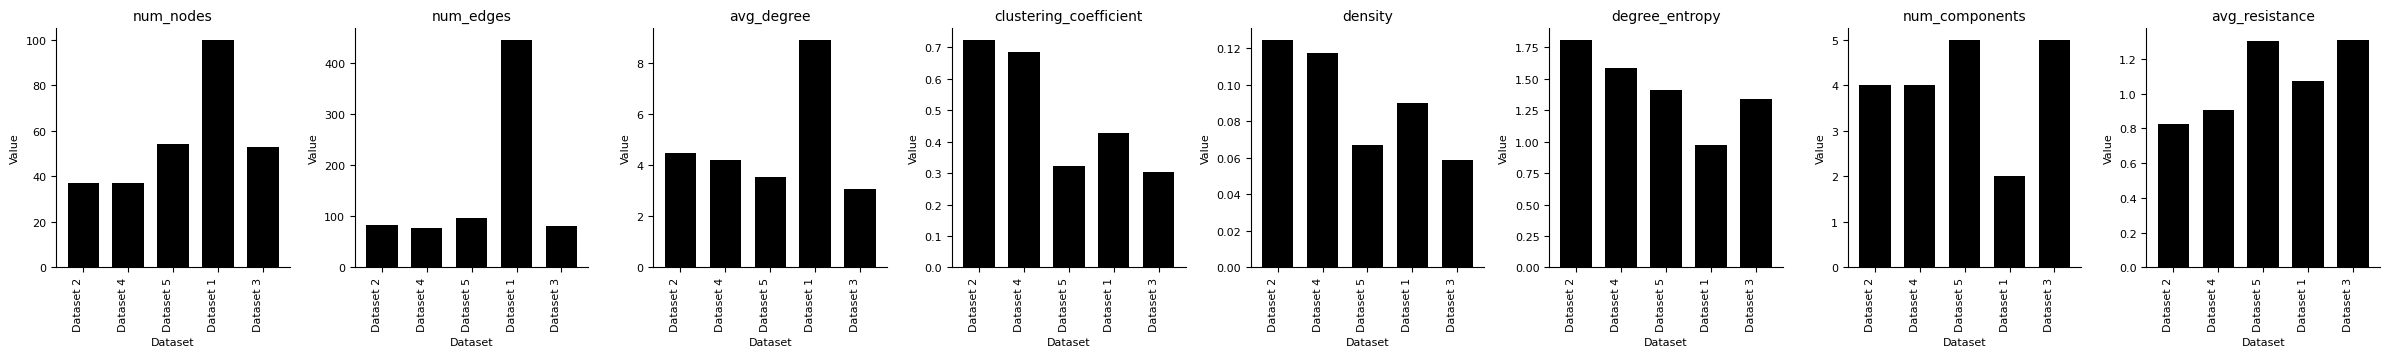

In [45]:
def calculate_complexity_metrics(G):
    metrics = {
        'num_nodes': G.number_of_nodes(),
        'num_edges': G.number_of_edges(),
        'avg_degree': np.mean([d for n, d in G.degree()]),
        'clustering_coefficient': nx.average_clustering(G),
        'density': nx.density(G),
        'num_components': nx.number_connected_components(G)
    }
    
    degree_counts = nx.degree_histogram(G)
    degree_dist = np.array(degree_counts) / sum(degree_counts)
    metrics['degree_entropy'] = entropy(degree_dist)
    
    metrics['avg_resistance'] = calculate_modified_resistance(G)
    
    return metrics

def calculate_modified_resistance(G):
    resistances = []
    for component in nx.connected_components(G):
        subgraph = G.subgraph(component)
        if len(subgraph) > 1:
            L = nx.laplacian_matrix(subgraph).toarray()
            L_pseudo_inv = np.linalg.pinv(L)
            resistance = np.mean([L_pseudo_inv[i,i] + L_pseudo_inv[j,j] - 2*L_pseudo_inv[i,j] 
                                  for i in range(len(L)) for j in range(i+1, len(L))])
            resistances.append(resistance)
    
    return np.mean(resistances) if resistances else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def calculate_meta_metric(metrics_df):
    weights = {
        'num_nodes': 0.05, 'num_edges': 0.05, 'avg_degree': 0.10,
        'clustering_coefficient': 0.1, 'density': 0.2,
        'degree_entropy': 0.2, 'num_components': 0.10,
        'avg_resistance': 0.2
    }
    
    normalized_scores = metrics_df.apply(zscore)
    weighted_scores = normalized_scores.dot(pd.Series(weights))
    
    # Apply sigmoid function to map scores to (0, 1) range
    return sigmoid(weighted_scores)

# Assuming dataframes, F1, F2, and find_point_less_than are defined

all_metrics = []
for i, df in enumerate(dataframes, 1):
    G = nx.Graph()
    t_values = np.arange(1, 21)
    x_t_values = F1(t_values)
    selected_points = [find_point_less_than(df, x) for x in x_t_values]
    
    for point in selected_points:
        if pd.notna(point):
            G.add_node(point)
            d = F2(point)
            connected_points = find_points_with_same_digit(df, point, d)
            for connected_point in connected_points:
                if connected_point != point:
                    G.add_node(connected_point)
                    G.add_edge(point, connected_point)
    
    metrics = calculate_complexity_metrics(G)
    metrics['Dataset'] = f'Dataset {i}'
    all_metrics.append(metrics)

# Create DataFrame with all metrics
metrics_df = pd.DataFrame(all_metrics)

# Calculate meta-metric
meta_metric = calculate_meta_metric(metrics_df.drop('Dataset', axis=1))
metrics_df['meta_metric'] = meta_metric

# Sort DataFrame by meta-metric
metrics_df = metrics_df.sort_values('meta_metric', ascending=False)

# Format the DataFrame for display
display_df = metrics_df.copy()
for col in display_df.columns:
    if col != 'Dataset':
        display_df[col] = display_df[col].apply(lambda x: f'{x:.4f}' if isinstance(x, float) else x)

display_df['Rank'] = range(1, len(display_df) + 1)
display_df = display_df.set_index('Rank')

# Reorder columns to have Dataset name first
cols = ['Dataset'] + [col for col in display_df.columns if col != 'Dataset']
display_df = display_df[cols]

# Display the table
print("\nComprehensive Complexity Metrics Table:")
print(display_df.to_string())

# Visualize all metrics in a single row
metrics_to_plot = ['num_nodes', 'num_edges', 'avg_degree', 'clustering_coefficient', 'density', 'degree_entropy', 'num_components', 'avg_resistance']
fig, axes = plt.subplots(1, 8, figsize=(24, 4))
#fig.suptitle('Comparison of Complexity Metrics Across Datasets', fontsize=16, color='black')

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i]
    metrics_df.set_index('Dataset')[metric].plot(kind='bar', ax=ax, color='black', width=0.7)
    ax.set_title(metric, color='black', fontsize=10)
    ax.set_xlabel('Dataset', color='black', fontsize=8)
    ax.set_ylabel('Value', color='black', fontsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(colors='black', labelsize=8)
    ax.grid(False)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()